In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

Немного поигрался с заданием на 6

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:/tesseract/tesseract.exe"

In [11]:
image_for_6 = cv2.imread("./image/chars1.png")

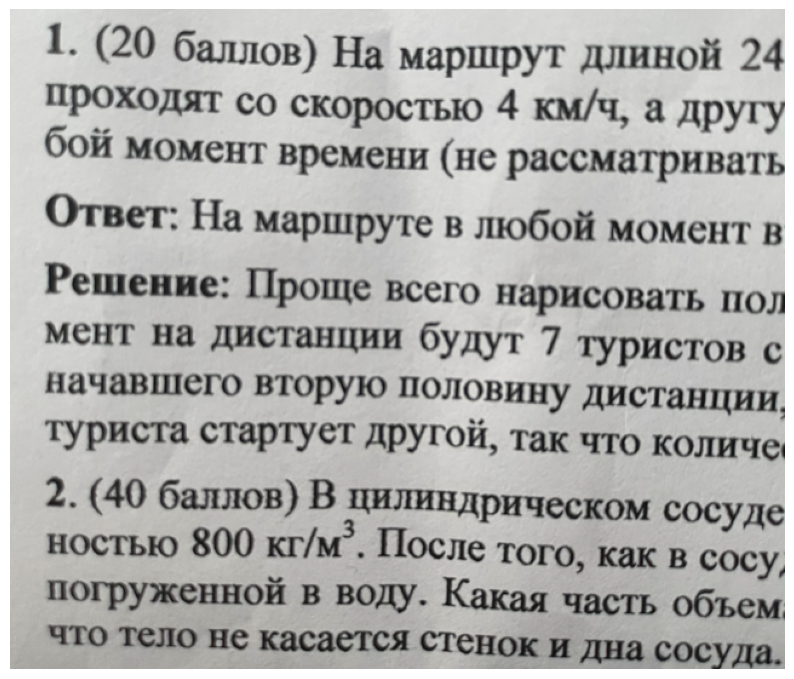

In [12]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(image_for_6)
plt.show()

In [13]:
string = pytesseract.image_to_string(image_for_6, lang ='rus')
print(string)

1. (20 баллов) На маршрут длиной 24
проходят со скоростью 4 км/ч, а другу
бой момент времени (не рассматривать

Ответ: На маршруте в любой момент |:

Решение: Проще всего нарисовать пол
мент на дистанции будут 7 туристов с
начавшего вторую половину дистанции,
туриста стартует другой, так что количе
2. (40 баллов) В цилиндрическом сосуде
ностью 800 кг/м?. После того, как в сосу,

погруженной в воду. Какая часть объем
что тело не касается стенок и дна сосуда.



In [14]:
len(string)

462

Задание на 8

In [15]:
image_for_8 = cv2.imread('./image/road1.png')
image_for_8 = cv2.cvtColor(image_for_8, cv2.COLOR_BGR2RGB)

(590, 1178, 3)


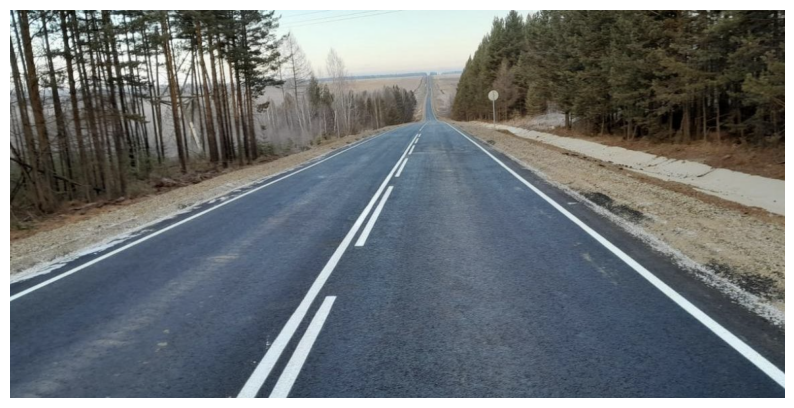

In [16]:
print(image_for_8.shape)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(image_for_8)
plt.show()

In [17]:
image_for_8_gray = cv2.cvtColor(image_for_8, cv2.COLOR_RGB2GRAY)

(590, 1178)


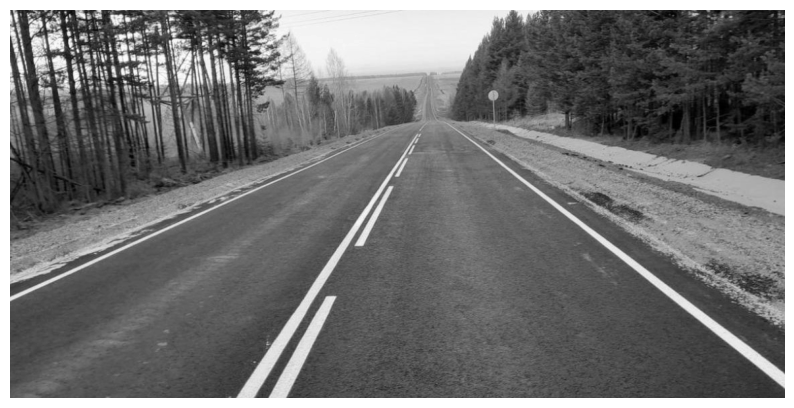

In [18]:
print(image_for_8_gray.shape)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(image_for_8_gray, cmap = 'gray')
plt.show()

In [19]:
image_for_8_gray_blur = cv2.GaussianBlur(image_for_8_gray, ksize=(9, 9), sigmaX=0)

(590, 1178)


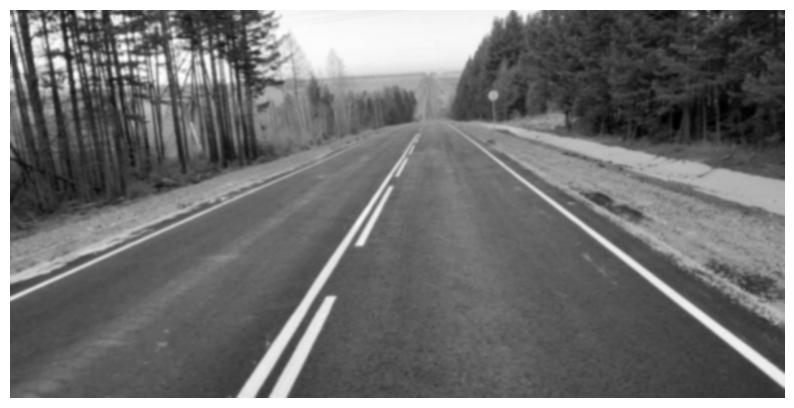

In [20]:
print(image_for_8_gray_blur.shape)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(image_for_8_gray_blur, cmap = 'gray')
plt.show()

In [21]:
image_for_8_gray_blur_edges = cv2.Canny(image_for_8_gray_blur, threshold1=200, threshold2=300)

(590, 1178)


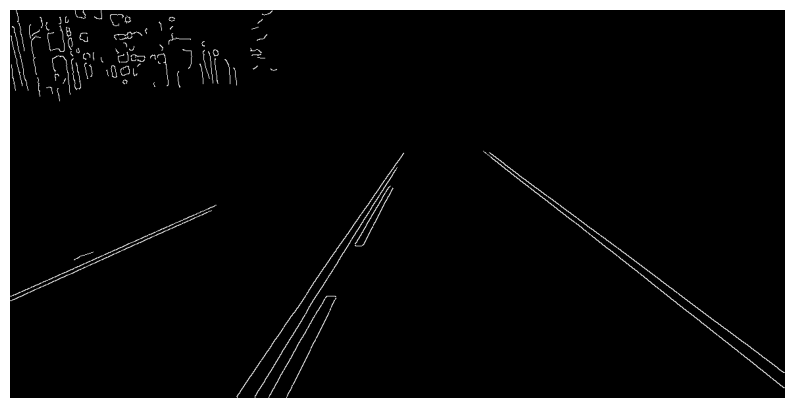

In [22]:
print(image_for_8_gray_blur_edges.shape)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(image_for_8_gray_blur_edges, cmap = 'gray')
plt.show()

In [23]:
lines = cv2.HoughLinesP(image=image_for_8_gray_blur_edges, rho=1, theta=np.pi/180, threshold=250, minLineLength=300, maxLineGap=50)
lines = lines.reshape(lines.shape[0], lines.shape[-1])
lines

array([[ 719,  215, 1133,  539],
       [ 376,  579,  587,  241],
       [   1,  435,  313,  297]], dtype=int32)

In [24]:
img_results = image_for_8.copy()
for line in lines:
    img_results = cv2.line(img=img_results, pt1=line[:2], pt2=line[2:4], color=(255,0,0), thickness=15)

(590, 1178, 3)


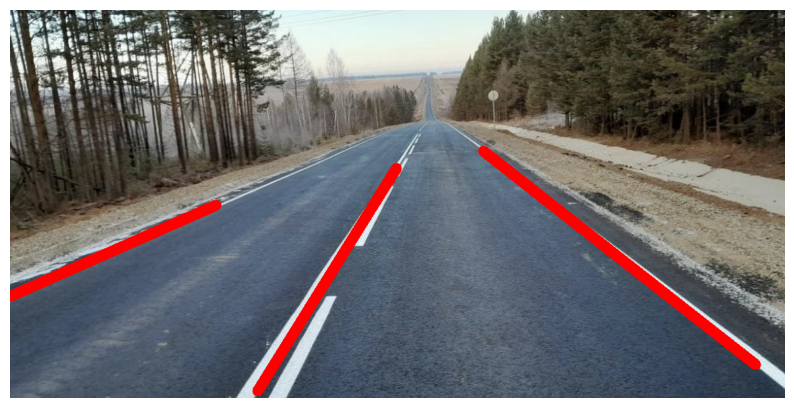

In [25]:
print(img_results.shape)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img_results, cmap = 'gray')
plt.show()

In [26]:
intersection_point = []

In [27]:
x1, y1, x2, y2 = lines[0]
x3, y3, x4, y4 = lines[1]
px= ( (x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) )
py= ( (x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) )
intersection_point.append(np.array([px, py], dtype=np.int32))
intersection_point[0]

array([641, 154])

In [28]:
x1, y1, x2, y2 = lines[0]
x3, y3, x4, y4 = lines[2]
px= ( (x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) )
py= ( (x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) )
intersection_point.append(np.array([px, py], dtype=np.int32))
intersection_point[1]

array([639, 152])

In [29]:
x1, y1, x2, y2 = lines[1]
x3, y3, x4, y4 = lines[2]
px= ( (x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) )
py= ( (x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) )
intersection_point.append(np.array([px, py], dtype=np.int32))
intersection_point[2]

array([643, 150])

In [30]:
common_intersection = np.mean(intersection_point, axis=0, dtype=np.int32)
common_intersection

array([641, 152])

In [31]:
img_results = cv2.circle(img=img_results, center=common_intersection, radius=1, color=(255,165,0), thickness=15)

(590, 1178, 3)


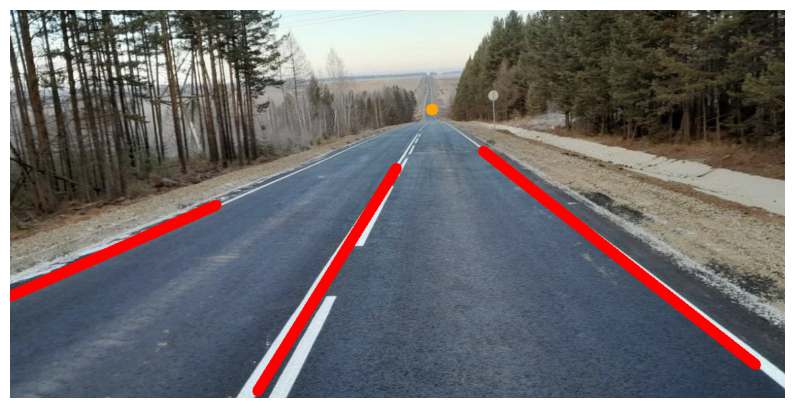

In [32]:
print(img_results.shape)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img_results, cmap = 'gray')
plt.show()